## <center> Final Capstone Assignment-Battle of Neighbourhoods </center>

**This is a project to find best place to set up shopping complex in Hyderabad by analysing its neighbourhoods**.

We will do this by performing the following activities :
- Web Scraping of Neighbourhoods of Hyderabad from Wikipedia
- Finding Coordinates of those neighbourhoods using Geocoder Module
- Using Top 100 Trending Venues in each neighbourhood using Foursquare API
- Clustering them using K-Means Clustering 
- Finally , Making Decision based on Clustering Data

At the end of this project , We will be able to know the suitable place for setting up of shopping mall in Hyderabad .

__Please note that the detailed explanation of the project and the assumptions are clearly mentioned in the final report document .Request you to refer that along with this assignment__.

In [2]:
## Downloading the required libraries for this assignment

import pandas as pd
import numpy as np
import urllib
import bs4

from urllib.request import urlopen
from bs4 import BeautifulSoup

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json  # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values


import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


In [82]:
url = 'https://en.wikipedia.org/wiki/Category:Neighbourhoods_in_Hyderabad,_India'
webpage =urlopen(url)

In [83]:
soup = BeautifulSoup(webpage, "html.parser")
type(soup)

bs4.BeautifulSoup

In [84]:
# Get the title
title = soup.title
print(title)

<title>Category:Neighbourhoods in Hyderabad, India - Wikipedia</title>


In [85]:
import csv

In [87]:
csv_file = open('hyderabad.csv', 'w')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(['Neighbourhood'])

15

### Scraping the page to extracting the list of neighbourhoods in Hyderabad

In [88]:

mwcg = soup.find_all(class_ = "mw-category-group")

length = len(mwcg) # Gets the length of number of 'mw-category-groups' present

for i in range(0, length):  # Gets all the neighbourhoods
    lists = mwcg [i].find_all('a')
    for list in lists:
        nbd = list.get('title') # Gets the title of the neighbourhood
        csv_writer.writerow([nbd]) # Writes the name of the neighbourhood in the csv file

In [89]:
csv_file.close()  ## Closiing CSV File

### Reading CSV File into Pandas Dataframe

In [90]:
df= pd.read_csv('hyderabad.csv',encoding='cp1252')

In [93]:
df.head()


Neighbourhood
0  A. S. Rao Nagar
1      A.C. Guards
2  Abhyudaya Nagar
3            Abids
4          Adikmet

### Finding Coordinates for those Neighbourhoods

In [94]:
!pip install geocoder
import geocoder

In [97]:
# define a function to get coordinates
def get_latlng(neighbourhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Hyderabad, India'.format(neighbourhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [98]:
# call the function to get the coordinates, store in a new list using list comprehension
coords = [ get_latlng(neighbourhood) for neighbourhood in df["Neighbourhood"].tolist() ]
coords

[[17.455470000000048, 78.54389000000003],
 [17.392977027745946, 78.45686724051741],
 [17.337650000000053, 78.56414000000007],
 [17.389800000000037, 78.47658000000007],
 [17.410610000000077, 78.51513000000006],
 [17.37751000000003, 78.48005000000006],
 [17.387364823969637, 78.4669870622138],
 [17.346330000000023, 78.47254000000004],
 [17.36068000000006, 78.47998000000007],
 [17.503370000000075, 78.41602000000006],
 [17.535430000000076, 78.54427000000004],
 [17.385820000000024, 78.51836000000003],
 [17.435350000000028, 78.44861000000003],
 [17.40784000000002, 78.49150000000003],
 [17.385140000000035, 78.44738000000007],
 [17.369170000000054, 78.43683000000004],
 [17.40710000000007, 78.50233000000003],
 [17.372720000000072, 78.49047000000007],
 [17.38897000000003, 78.48681000000005],
 [17.39931000000007, 78.49964000000006],
 [17.339920000000063, 78.54553000000004],
 [17.448510000000056, 78.44924000000003],
 [17.415350000000046, 78.43435000000005],
 [17.38859199570786, 78.47665099785392],


In [99]:

df_coords=pd.DataFrame(coords,columns=['Latitude','Longitude'])
df_coords.head()

Latitude  Longitude
0  17.455470  78.543890
1  17.392977  78.456867
2  17.337650  78.564140
3  17.389800  78.476580
4  17.410610  78.515130

In [101]:
df['Latitude']=df_coords['Latitude']
df['Longitude']=df_coords['Longitude']
df.head()


Neighbourhood   Latitude  Longitude
0  A. S. Rao Nagar  17.455470  78.543890
1      A.C. Guards  17.392977  78.456867
2  Abhyudaya Nagar  17.337650  78.564140
3            Abids  17.389800  78.476580
4          Adikmet  17.410610  78.515130

### Creating Map of Hyderabad with its neighbourhoods superimposed on it

In [19]:
# get the coordinates of Kuala Lumpur
address = 'Hyderabad,India'

geolocator = Nominatim(user_agent="test")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Hyderabad,India {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Hyderabad,India 17.38878595, 78.4610647345315.


In [20]:

# create map of Toronto using latitude and longitude values
map_hyderabad = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighbourhood in zip(df['Latitude'], df['Longitude'],df['Neighbourhood']):
    label = '{}, Hyderabad'.format(neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_hyderabad)  
    
map_hyderabad


### Define Foursquare API Credentials

In [21]:
CLIENT_ID = 'HZZSTO4XYTAFMRSBPCGP3MQ5QDIRJI3R4Y0AASBDM0HARHWG' # your Foursquare ID
CLIENT_SECRET = '3LKQ2ZXL3PTJ10LFI4FWYA3G1CE4R3BL3SSU5IJ5WN0BAP04' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: HZZSTO4XYTAFMRSBPCGP3MQ5QDIRJI3R4Y0AASBDM0HARHWG
CLIENT_SECRET:3LKQ2ZXL3PTJ10LFI4FWYA3G1CE4R3BL3SSU5IJ5WN0BAP04


### Explore Neighbourhoods in Hyderabad

In [22]:
LIMIT = 100
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [23]:
hyderabad_venues = getNearbyVenues(names=df['Neighbourhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )
hyderabad_venues.shape

A. S. Rao Nagar
A.C. Guards
Abhyudaya Nagar
Abids
Adikmet
Afzal Gunj
Aghapura
Aliabad, Hyderabad
Alijah Kotla
Allwyn Colony
Alwal
Amberpet
Ameerpet
Ashok Nagar, Hyderabad
Asif Nagar
Attapur
Azamabad, Hyderabad
Azampura
Badichowdi
Bagh Lingampally
Bairamalguda
Balkampet
Banjara Hills
Bank Street, Hyderabad
Barkas, Hyderabad
Barkatpura
Basheerbagh
Bazarghat
Begum Bazaar
Begumpet
Bharat Nagar
BHEL Township, Hyderabad
BJR Nagar
Boggulkunta
Borabanda
Bowenpally
Brahman Vaadi
Chaderghat
Champapet
Chanchalguda
Chandrayan Gutta
Chatta Bazaar
Cherlapally
Chikkadpally
Chilkalguda
Chintal Basti
Chintalakunta
Dabirpura
Dar-ul-Shifa
Dhoolpet
Dilsukhnagar
Domalguda
ECIL 'X' Roads
Edi Bazar
Erragadda
Fateh Nagar, Hyderabad
Ferozguda
Film Nagar
Gachibowli
Gaddiannaram
Golnaka
Goshamahal
Gudimalkapur
Gulzar Houz
Habsiguda
Hafeezpet
Hasmathpet
Hastinapuram
Hayathnagar
Himayatnagar, Hyderabad
HITEC City
Hyderguda
IDA Bollaram
Izzat Nagar
Jahanuma
Jalal Baba Nagar
Jamia Osmania
Jeedimetla
Jubilee Hills
Ka

(1031, 7)

In [24]:
hyderabad_venues.head()

Neighbourhood  Neighbourhood Latitude  Neighbourhood Longitude  \
0  A. S. Rao Nagar               17.455470                78.543890   
1  A. S. Rao Nagar               17.455470                78.543890   
2  A. S. Rao Nagar               17.455470                78.543890   
3  A. S. Rao Nagar               17.455470                78.543890   
4      A.C. Guards               17.392977                78.456867   

                     Venue  Venue Latitude  Venue Longitude  \
0           Reliance Fresh       17.456698        78.545802   
1           Green Bawarchi       17.457901        78.543900   
2           gossips bakery       17.456999        78.545902   
3  Zidane's Fitness Studio       17.457097        78.545969   
4            Hotel Marjaan       17.395373        78.455115   

         Venue Category  
0           Supermarket  
1     Indian Restaurant  
2  Fast Food Restaurant  
3                   Gym  
4                  Café

In [25]:
hyderabad_venues.groupby('Neighbourhood').count()

Neighbourhood Latitude  \
Neighbourhood                                                
A. S. Rao Nagar                                          4   
A.C. Guards                                              2   
Abhyudaya Nagar                                          4   
Abids                                                   19   
Adikmet                                                  4   
Afzal Gunj                                               4   
Aghapura                                                 2   
Aliabad, Hyderabad                                       6   
Alijah Kotla                                             2   
Allwyn Colony                                            2   
Amberpet                                                 1   
Ameerpet                                                 9   
Ashok Nagar, Hyderabad                                   4   
Azamabad, Hyderabad                                      4   
Azampura                                                 3   
BHEL Township, Hyderabad                                 2   
BJR Nagar                                                5   
Badichowdi                                               8   
Bagh Lingampally                                         3   
Bairamalguda                                             4   
Balkampet                                                6   
Banjara Hills                                            7   
Bank Street, Hyderabad                                  16   
Barkas, Hyderabad                                        3   
Barkatpura                                               8   
Basheerbagh                                             30   
Bazarghat                                                4   
Begum Bazaar                                             2   
Begumpet                                                 4   
Boggulkunta                                             15   
Borabanda                                                1   
Bowenpally                                               5   
Brahman Vaadi                                            1   
Chaderghat                                               6   
Champapet                                                3   
Chanchalguda                                             5   
Chatta Bazaar                                            6   
Chikkadpally                                             9   
Chilkalguda                                              5   
Chintal Basti                                            4   
Chintalakunta                                            4   
Dabirpura                                                5   
Dar-ul-Shifa                                             4   
Dhoolpet                                                 1   
Dilsukhnagar                                             6   
Domalguda                                                1   
ECIL 'X' Roads                                           4   
Erragadda                                                5   
Fateh Nagar, Hyderabad                                   4   
Ferozguda                                                5   
Film Nagar                                               4   
Gachibowli                                              29   
Gaddiannaram                                             4   
Goshamahal                                               4   
Gudimalkapur                                             5   
Gulzar Houz                                              6   
HITEC City                                               9   
Habsiguda                                               12   
Hafeezpet                                                5   
Hasmathpet                                               2   
Hastinapuram                                             2   
Himayatnagar, Hyderabad                                 24   
Hyderguda                                               10   
IDA Bo

In [26]:

print('There are {} uniques categories of Venues.'.format(len(hyderabad_venues['Venue Category'].unique())))

There are 151 uniques categories of Venues.


In [41]:
# one hot encoding
hyderabad_onehot = pd.get_dummies(hyderabad_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
hyderabad_onehot['Neighbourhood'] = hyderabad_venues['Neighbourhood']

# move neighborhood column to the first column
#fixed_columns = [hyderabad_onehot.columns[-1]] + list(hyderabad_onehot.columns[-1:])
#hyderabad_onehot = hyderabad_onehot[fixed_columns]

hyderabad_onehot =hyderabad_onehot.set_index('Neighbourhood')
hyderabad_onehot.head(10)

ATM  Accessories Store  Afghan Restaurant  Airport Service  \
Neighbourhood                                                                 
A. S. Rao Nagar    0                  0                  0                0   
A. S. Rao Nagar    0                  0                  0                0   
A. S. Rao Nagar    0                  0                  0                0   
A. S. Rao Nagar    0                  0                  0                0   
A.C. Guards        0                  0                  0                0   
A.C. Guards        0                  0                  0                0   
Abhyudaya Nagar    0                  0                  0                0   
Abhyudaya Nagar    0                  0                  0                0   
Abhyudaya Nagar    0                  0                  0                0   
Abhyudaya Nagar    0                  0                  0                0   

                 Andhra Restaurant  Arts & Crafts Store  Asian Restaurant  \
Neighbourhood                                                               
A. S. Rao Nagar                  0                    0                 0   
A. S. Rao Nagar                  0                    0                 0   
A. S. Rao Nagar                  0                    0                 0   
A. S. Rao Nagar                  0                    0                 0   
A.C. Guards                      0                    0                 0   
A.C. Guards                      0                    0                 0   
Abhyudaya Nagar                  0                    0                 0   
Abhyudaya Nagar                  0                    0                 0   
Abhyudaya Nagar                  0                    0                 0   
Abhyudaya Nagar                  0                    0                 0   

                 Athletics & Sports  BBQ Joint  Badminton Court  Bakery  Bar  \
Neighbourhood                                                                  
A. S. Rao Nagar                   0          0                0       0    0   
A. S. Rao Nagar                   0          0                0       0    0   
A. S. Rao Nagar                   0          0                0       0    0   
A. S. Rao Nagar                   0          0                0       0    0   
A.C. Guards                       0          0                0       0    0   
A.C. Guards                       0          0                0       0    0   
Abhyudaya Nagar                   0          0                0       0    0   
Abhyudaya Nagar                   0          0                0       0    0   
Abhyudaya Nagar                   0          0                0       0    0   
Abhyudaya Nagar                   0          0                0       0    0   

                 Basketball Court  Bed & Breakfast  Beer Garden  \
Neighbourhood                                                     
A. S. Rao Nagar                 0                0            0   
A. S. Rao Nagar                 0                0            0   
A. S. Rao Nagar                 0                0            0   
A. S. Rao Nagar                 0                0            0   
A.C. Guards                     0                0            0   
A.C. Guards                     0                0            0   
Abhyudaya Nagar                 0                0            0   
Abhyudaya Nagar                 0                0            0   
Abhyudaya Nagar                 0                0            0   
Abhyudaya Nagar                 0                0            0   

                 Bike Rental / Bike Share  Bistro  Bookstore  Boutique  \
Neighbourhood                                                            
A. S. Rao Nagar                         0       0          0         0   
A. S. Rao Nagar                         0       0          0         0   
A. S. Rao Nagar                         0       0          0         0   
A. S. R

In [42]:
hyderabad_onehot.shape

(1031, 151)

In [43]:
hyderabad_grouped = hyderabad_onehot.groupby('Neighbourhood').mean().reset_index()
hyderabad_grouped

Neighbourhood       ATM  Accessories Store  \
0                       A. S. Rao Nagar  0.000000           0.000000   
1                           A.C. Guards  0.000000           0.000000   
2                       Abhyudaya Nagar  0.000000           0.000000   
3                                 Abids  0.000000           0.000000   
4                               Adikmet  0.000000           0.000000   
5                            Afzal Gunj  0.000000           0.000000   
6                              Aghapura  0.000000           0.000000   
7                    Aliabad, Hyderabad  0.000000           0.000000   
8                          Alijah Kotla  0.000000           0.000000   
9                         Allwyn Colony  0.000000           0.000000   
10                             Amberpet  0.000000           0.000000   
11                             Ameerpet  0.000000           0.000000   
12               Ashok Nagar, Hyderabad  0.000000           0.000000   
13                  Azamabad, Hyderabad  0.000000           0.000000   
14                             Azampura  0.000000           0.000000   
15             BHEL Township, Hyderabad  0.000000           0.000000   
16                            BJR Nagar  0.000000           0.000000   
17                           Badichowdi  0.000000           0.000000   
18                     Bagh Lingampally  0.000000           0.000000   
19                         Bairamalguda  0.000000           0.000000   
20                            Balkampet  0.000000           0.000000   
21                        Banjara Hills  0.000000           0.000000   
22               Bank Street, Hyderabad  0.000000           0.000000   
23                    Barkas, Hyderabad  0.000000           0.000000   
24                           Barkatpura  0.000000           0.000000   
25                          Basheerbagh  0.000000           0.000000   
26                            Bazarghat  0.000000           0.000000   
27                         Begum Bazaar  0.000000           0.000000   
28                             Begumpet  0.000000           0.000000   
29                          Boggulkunta  0.000000           0.000000   
30                            Borabanda  0.000000           0.000000   
31                           Bowenpally  0.000000           0.000000   
32                        Brahman Vaadi  0.000000           0.000000   
33                           Chaderghat  0.000000           0.000000   
34                            Champapet  0.000000           0.000000   
35                         Chanchalguda  0.000000           0.000000   
36                        Chatta Bazaar  0.000000           0.000000   
37                         Chikkadpally  0.000000           0.000000   
38                          Chilkalguda  0.000000           0.000000   
39                        Chintal Basti  0.000000           0.000000   
40                        Chintalakunta  0.000000           0.000000   
41                            Dabirpura  0.000000           0.000000   
42                         Dar-ul-Shifa  0.000000           0.000000   
43                             Dhoolpet  0.000000           0.000000   
44                         Dilsukhnagar  0.000000           0.000000   
45                            Domalguda  0.000000           0.000000   
46                       ECIL 'X' Roads  0.000000           0.000000   
47                            Erragadda  0.000000           0.000000   
48               Fateh Nagar, Hyderabad  0.250000           0.000000   
49                            Ferozguda  0.000000           0.000000   
50                           Film Nagar  0.000000           0.000000   
51                           Gachibowli  0.000000           0.000000   
52                         Gaddiannaram  0.000000           0.000000   
53                           Goshamahal  0.000000           0.000000   
54                         Gudimalkapur  0.000000           0.0000

In [47]:
num_top_venues = 5
i=0
while i < 6 :
    for hood in hyderabad_grouped['Neighbourhood']:
        print("----"+hood+"----")
        temp = hyderabad_grouped[hyderabad_grouped['Neighbourhood'] == hood].T.reset_index()
        temp.columns = ['venue','freq']
        temp = temp.iloc[1:]
        temp['freq'] = temp['freq'].astype(float)
        temp = temp.round({'freq': 2})
        print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
        print('\n')
        i=i+1
        if i>=6 :
            break


----A. S. Rao Nagar----
                  venue  freq
0  Fast Food Restaurant  0.25
1                   Gym  0.25
2     Indian Restaurant  0.25
3           Supermarket  0.25
4   Monument / Landmark  0.00


----A.C. Guards----
                 venue  freq
0          Snack Place   0.5
1                 Café   0.5
2            Multiplex   0.0
3    Mobile Phone Shop   0.0
4  Monument / Landmark   0.0


----Abhyudaya Nagar----
               venue  freq
0  Indian Restaurant  0.50
1              Hotel  0.25
2       Burger Joint  0.25
3                ATM  0.00
4             Museum  0.00


----Abids----
               venue  freq
0  Indian Restaurant  0.21
1              Hotel  0.11
2          Juice Bar  0.11
3  Mobile Phone Shop  0.05
4          Bookstore  0.05


----Adikmet----
         venue  freq
0     Pharmacy  0.25
1  Pizza Place  0.25
2     Platform  0.25
3         Café  0.25
4    Multiplex  0.00


----Afzal Gunj----
                 venue  freq
0          Pizza Place  0.25
1  Arts & C

In [48]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [50]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = hyderabad_grouped['Neighbourhood']

for ind in np.arange(hyderabad_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(hyderabad_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()

Neighbourhood 1st Most Common Venue 2nd Most Common Venue  \
0  A. S. Rao Nagar  Fast Food Restaurant     Indian Restaurant   
1      A.C. Guards                  Café           Snack Place   
2  Abhyudaya Nagar     Indian Restaurant                 Hotel   
3            Abids     Indian Restaurant                 Hotel   
4          Adikmet              Pharmacy           Pizza Place   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                   Gym           Supermarket         Women's Store   
1         Women's Store        Farmers Market            Food Court   
2          Burger Joint        Farmers Market            Food Court   
3             Juice Bar          Neighborhood            Shoe Store   
4              Platform                  Café         Women's Store   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0    Falafel Restaurant     Food & Drink Shop                  Food   
1     Food & Drink Shop                  Food           Flower Shop   
2     Food & Drink Shop                  Food           Flower Shop   
3         Shopping Mall           Snack Place             Bookstore   
4    Falafel Restaurant                  Food           Flower Shop   

  9th Most Common Venue 10th Most Common Venue  
0           Flower Shop            Flea Market  
1           Flea Market   Fast Food Restaurant  
2           Flea Market   Fast Food Restaurant  
3  Fast Food Restaurant      Mobile Phone Shop  
4           Flea Market   Fast Food Restaurant

In [52]:
len(hyderabad_grouped['Shopping Mall']>0)

181

### Setting up Datframe suitable for clustering

In [64]:
hyderabad_grouped_clustering = hyderabad_grouped.drop('Neighbourhood', 1)

### Clustering Neighbourhoods

In [71]:
distortions=[]
K = range(1,15)


for k in K :
# run k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=0).fit(hyderabad_grouped_clustering)
    distortions.append(kmeans.inertia_)

distortions


[57.67725025488035,
 54.29950638655323,
 51.25162135718952,
 48.2400650946193,
 47.05641868197619,
 45.81168971292266,
 44.27347690108051,
 42.051739303342785,
 41.682869891900786,
 39.92648359570071,
 39.32846858387452,
 38.643909057868925,
 37.378624575012466,
 36.32655508019961]

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

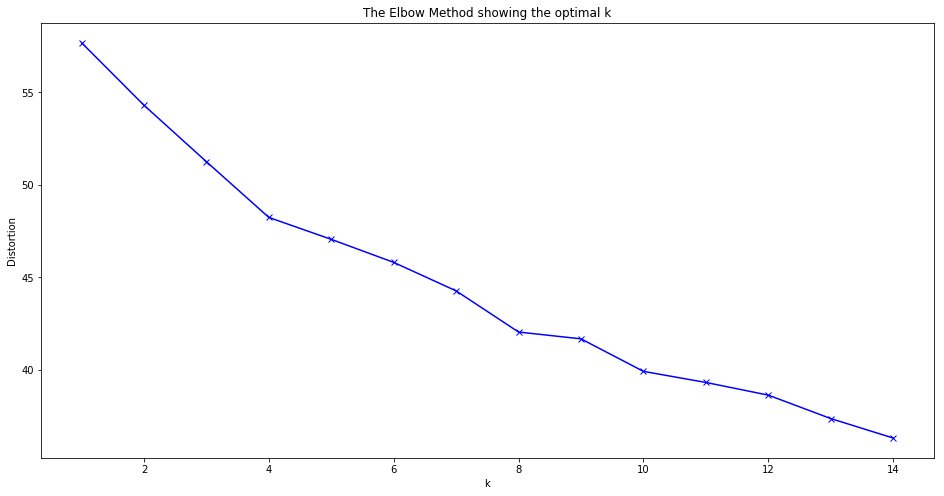

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')


#### Here it is clear that K=4 is the elbow point , so we choose K=4 for Clustering purposes

In [77]:
# set number of clusters
k = 4

# run k-means clustering
kmeans = KMeans(n_clusters=k, random_state=0).fit(hyderabad_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 3, 1, 1, 0, 0, 3, 0, 0, 0])

In [117]:
neighbourhoods_venues_sorted.insert(1, 'Labels', kmeans.labels_)
#neighbourhoods_venues_sorted.drop(['Labels'],axis=1, inplace=True)
neighbourhoods_venues_sorted.head()

Neighbourhood  Labels 1st Most Common Venue 2nd Most Common Venue  \
0  A. S. Rao Nagar       1  Fast Food Restaurant     Indian Restaurant   
1      A.C. Guards       3                  Café           Snack Place   
2  Abhyudaya Nagar       1     Indian Restaurant                 Hotel   
3            Abids       1     Indian Restaurant                 Hotel   
4          Adikmet       0              Pharmacy           Pizza Place   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                   Gym           Supermarket         Women's Store   
1         Women's Store        Farmers Market            Food Court   
2          Burger Joint        Farmers Market            Food Court   
3             Juice Bar          Neighborhood            Shoe Store   
4              Platform                  Café         Women's Store   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0    Falafel Restaurant     Food & Drink Shop                  Food   
1     Food & Drink Shop                  Food           Flower Shop   
2     Food & Drink Shop                  Food           Flower Shop   
3         Shopping Mall           Snack Place             Bookstore   
4    Falafel Restaurant                  Food           Flower Shop   

  9th Most Common Venue 10th Most Common Venue  
0           Flower Shop            Flea Market  
1           Flea Market   Fast Food Restaurant  
2           Flea Market   Fast Food Restaurant  
3  Fast Food Restaurant      Mobile Phone Shop  
4           Flea Market   Fast Food Restaurant

In [122]:
hyderabad_data =df.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')
hyderabad_data.head()

Neighbourhood   Latitude  Longitude  Labels 1st Most Common Venue  \
0  A. S. Rao Nagar  17.455470  78.543890     1.0  Fast Food Restaurant   
1      A.C. Guards  17.392977  78.456867     3.0                  Café   
2  Abhyudaya Nagar  17.337650  78.564140     1.0     Indian Restaurant   
3            Abids  17.389800  78.476580     1.0     Indian Restaurant   
4          Adikmet  17.410610  78.515130     0.0              Pharmacy   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0     Indian Restaurant                   Gym           Supermarket   
1           Snack Place         Women's Store        Farmers Market   
2                 Hotel          Burger Joint        Farmers Market   
3                 Hotel             Juice Bar          Neighborhood   
4           Pizza Place              Platform                  Café   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0         Women's Store    Falafel Restaurant     Food & Drink Shop   
1            Food Court     Food & Drink Shop                  Food   
2            Food Court     Food & Drink Shop                  Food   
3            Shoe Store         Shopping Mall           Snack Place   
4         Women's Store    Falafel Restaurant                  Food   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0                  Food           Flower Shop            Flea Market  
1           Flower Shop           Flea Market   Fast Food Restaurant  
2           Flower Shop           Flea Market   Fast Food Restaurant  
3             Bookstore  Fast Food Restaurant      Mobile Phone Shop  
4           Flower Shop           Flea Market   Fast Food Restaurant

In [124]:
print(hyderabad_data[hyderabad_data['Labels'].isnull()])
hyderabad_data = hyderabad_data.dropna(subset=['Labels'])
hyderabad_data.head()

                            Neighbourhood   Latitude  Longitude  Labels  \
10                                  Alwal  17.535430  78.544270     NaN   
14                             Asif Nagar  17.385140  78.447380     NaN   
15                                Attapur  17.369170  78.436830     NaN   
30                           Bharat Nagar  17.528340  78.525040     NaN   
40                       Chandrayan Gutta  17.322476  78.469045     NaN   
42                            Cherlapally  17.466480  78.599990     NaN   
53                              Edi Bazar  17.344520  78.494190     NaN   
60                                Golnaka  17.391920  78.505640     NaN   
68                            Hayathnagar  17.333950  78.612770     NaN   
75                       Jalal Baba Nagar  17.354420  78.432550     NaN   
89             Kings Colony, Shastripuram  17.322940  78.450170     NaN   
111                     Madina, Hyderabad  17.325010  78.493020     NaN   
139  Nagaram, Medchal–Mal

Neighbourhood   Latitude  Longitude  Labels 1st Most Common Venue  \
0  A. S. Rao Nagar  17.455470  78.543890     1.0  Fast Food Restaurant   
1      A.C. Guards  17.392977  78.456867     3.0                  Café   
2  Abhyudaya Nagar  17.337650  78.564140     1.0     Indian Restaurant   
3            Abids  17.389800  78.476580     1.0     Indian Restaurant   
4          Adikmet  17.410610  78.515130     0.0              Pharmacy   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0     Indian Restaurant                   Gym           Supermarket   
1           Snack Place         Women's Store        Farmers Market   
2                 Hotel          Burger Joint        Farmers Market   
3                 Hotel             Juice Bar          Neighborhood   
4           Pizza Place              Platform                  Café   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0         Women's Store    Falafel Restaurant     Food & Drink Shop   
1            Food Court     Food & Drink Shop                  Food   
2            Food Court     Food & Drink Shop                  Food   
3            Shoe Store         Shopping Mall           Snack Place   
4         Women's Store    Falafel Restaurant                  Food   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0                  Food           Flower Shop            Flea Market  
1           Flower Shop           Flea Market   Fast Food Restaurant  
2           Flower Shop           Flea Market   Fast Food Restaurant  
3             Bookstore  Fast Food Restaurant      Mobile Phone Shop  
4           Flower Shop           Flea Market   Fast Food Restaurant

In [126]:
hyderabad_data.shape

(181, 14)

In [132]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(hyderabad_data['Latitude'], hyderabad_data['Longitude'], hyderabad_data['Neighbourhood'], hyderabad_data['Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


### Examine Clusters

#### Cluster0

In [148]:
hyderabad_data.loc[hyderabad_data['Labels'] == 0].head()

Neighbourhood  Latitude  Longitude  Labels  \
4                  Adikmet  17.41061   78.51513     0.0   
5               Afzal Gunj  17.37751   78.48005     0.0   
7       Aliabad, Hyderabad  17.34633   78.47254     0.0   
8             Alijah Kotla  17.36068   78.47998     0.0   
9            Allwyn Colony  17.50337   78.41602     0.0   
11                Amberpet  17.38582   78.51836     0.0   
13  Ashok Nagar, Hyderabad  17.40784   78.49150     0.0   
16     Azamabad, Hyderabad  17.40710   78.50233     0.0   
18              Badichowdi  17.38897   78.48681     0.0   
20            Bairamalguda  17.33992   78.54553     0.0   

        1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
4                    Pharmacy           Pizza Place              Platform   
5                 Tailor Shop           Pizza Place   Arts & Crafts Store   
7                 Snack Place               Theater            Food Court   
8   Middle Eastern Restaurant             Gift Shop         Women's Store   
9              Clothing Store                Bakery         Women's Store   
11                        Spa         Women's Store        Farmers Market   
13              Movie Theater          Dessert Shop  Fast Food Restaurant   
16              Movie Theater                 Diner        Clothing Store   
18                Coffee Shop                Bakery           Bus Station   
20             Breakfast Spot          Night Market         Garden Center   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
4                   Café         Women's Store    Falafel Restaurant   
5         Breakfast Spot          Dessert Shop        Farmers Market   
7         Ice Cream Shop      Asian Restaurant                   Gym   
8         Farmers Market     Food & Drink Shop                  Food   
9         Farmers Market            Food Court     Food & Drink Shop   
11            Food Court     Food & Drink Shop                  Food   
13         Women's Store        Farmers Market            Food Court   
16           Bus Station         Women's Store     Food & Drink Shop   
18      Asian Restaurant             Multiplex            Restaurant   
20      Drive-in Theater  Fast Food Restaurant            Food Court   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
4                   Food           Flower Shop           Flea Market   
5             Food Court     Food & Drink Shop                  Food   
7                  Diner            Donut Shop          Dessert Shop   
8            Flower Shop           Flea Market  Fast Food Restaurant   
9                   Food           Flower Shop           Flea Market   
11           Flower Shop           Flea Market  Fast Food Restaurant   
13     Food & Drink Shop                  Food           Flower Shop   
16                  Food           Flower Shop           Flea Market   
18   Indie Movie Theater        Farmers Market     Food & Drink Shop   
20     Food & Drink Shop                  Food           Flower Shop   

   10th Most Common Venue  
4    Fast Food Restaurant  
5             Flower Shop  
7        Department Store  
8      Falafel Restaurant  
9    Fast Food Restaurant  
11     Falafel Restaurant  
13            Flea Market  
16   Fast Food Restaurant  
18                   Food  
20            Flea Market

In [141]:
hyderabad_data.loc[hyderabad_data['Labels'] == 0].shape

(110, 14)

#### Cluster2

In [140]:
hyderabad_data.loc[hyderabad_data['Labels'] == 1].head()

Neighbourhood  Latitude  Longitude  Labels 1st Most Common Venue  \
0   A. S. Rao Nagar  17.45547   78.54389     1.0  Fast Food Restaurant   
2   Abhyudaya Nagar  17.33765   78.56414     1.0     Indian Restaurant   
3             Abids  17.38980   78.47658     1.0     Indian Restaurant   
12         Ameerpet  17.43535   78.44861     1.0     Indian Restaurant   
17         Azampura  17.37272   78.49047     1.0        Breakfast Spot   

            2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0               Indian Restaurant                   Gym           Supermarket   
2                           Hotel          Burger Joint        Farmers Market   
3                           Hotel             Juice Bar          Neighborhood   
12  Vegetarian / Vegan Restaurant      Department Store                 Diner   
17                  Train Station     Indian Restaurant    Falafel Restaurant   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0          Women's Store    Falafel Restaurant     Food & Drink Shop   
2             Food Court     Food & Drink Shop                  Food   
3             Shoe Store         Shopping Mall           Snack Place   
12            Restaurant                Bakery         Women's Store   
17            Food Court     Food & Drink Shop                  Food   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0                   Food           Flower Shop            Flea Market  
2            Flower Shop           Flea Market   Fast Food Restaurant  
3              Bookstore  Fast Food Restaurant      Mobile Phone Shop  
12        Farmers Market     Food & Drink Shop                   Food  
17           Flower Shop           Flea Market   Fast Food Restaurant

#### Cluster2

In [143]:
hyderabad_data.loc[hyderabad_data['Labels'] == 2].head()

Neighbourhood   Latitude  Longitude  Labels 1st Most Common Venue  \
118      Mallapur  17.450017  78.609361     2.0                   ATM   
138      Nacharam  17.433510  78.566730     2.0                   ATM   
157    Parsigutta  17.416630  78.510930     2.0                   ATM   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
118   Fried Chicken Joint            Food Court     Food & Drink Shop   
138   Fried Chicken Joint            Food Court     Food & Drink Shop   
157   Fried Chicken Joint            Food Court     Food & Drink Shop   

    5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
118                  Food           Flower Shop           Flea Market   
138                  Food           Flower Shop           Flea Market   
157                  Food           Flower Shop           Flea Market   

    8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
118  Fast Food Restaurant        Farmers Market     Falafel Restaurant  
138  Fast Food Restaurant        Farmers Market     Falafel Restaurant  
157  Fast Food Restaurant        Farmers Market     Falafel Restaurant

In [144]:
hyderabad_data.loc[hyderabad_data['Labels'] == 2].shape

(3, 14)

#### Cluster3

In [146]:
hyderabad_data.loc[hyderabad_data['Labels'] == 3].head()

Neighbourhood   Latitude  Longitude  Labels 1st Most Common Venue  \
1    A.C. Guards  17.392977  78.456867     3.0                  Café   
6       Aghapura  17.387365  78.466987     3.0        Clothing Store   
57    Film Nagar  17.413910  78.405470     3.0                  Café   
84        Karwan  17.379070  78.436680     3.0                  Café   
96    Kushaiguda  17.481130  78.583700     3.0                  Café   

      2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
1               Snack Place         Women's Store        Farmers Market   
6                      Café         Women's Store        Farmers Market   
57  New American Restaurant        Scenic Lookout         Women's Store   
84            Women's Store        Farmers Market            Food Court   
96            Women's Store        Farmers Market            Food Court   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
1             Food Court     Food & Drink Shop                  Food   
6             Food Court     Food & Drink Shop                  Food   
57    Falafel Restaurant                  Food           Flower Shop   
84     Food & Drink Shop                  Food           Flower Shop   
96     Food & Drink Shop                  Food           Flower Shop   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
1            Flower Shop           Flea Market   Fast Food Restaurant  
6            Flower Shop           Flea Market   Fast Food Restaurant  
57           Flea Market  Fast Food Restaurant         Farmers Market  
84           Flea Market  Fast Food Restaurant     Falafel Restaurant  
96           Flea Market  Fast Food Restaurant     Falafel Restaurant

In [147]:
hyderabad_data.loc[hyderabad_data['Labels'] == 3].shape

(8, 14)

Based on these Clusters , it is very clear that there are no shopping malls in Cluster2 and Cluster 3. So there is a scope to establish a shopping mall which does not need to complete with already existing and well established shopping malls.
Also, if we observe Cluster 2 is completely outskirts (refer map ) and situation may arise that there will not be enough customers available in those areas. At the same time , Cluster 3 already has some women's store and Scenic Lookout stores, which means this is the right cluster to invest in shopping malls as there are customers who can be attracted towards our shopping mall. 